# 텍스트 분석과 시각화

- 빈도를 바탕으로 한 그래프와 워드 클라우드(word cloud)
- 텍스트 분석은 문서를 구성하는 단어 파악이 핵심
- 예. 대통령 연설문에 사용된 단어들의 빈도 분석 -> 대통령이 중요시하는 것이 무엇인지 의도파악
  - https://cyram.tistory.com/309

## 1. 단어 빈도 그래프 : 가장 많이 쓰인 단어는?

- 토큰화, 어간 추출, 불용어 제거 등 텍스트 데이터 전처리 후 진행

#### 예제 데이터. 
- 영어소설 : 루이스캐럴의 '이상한 나라의 앨리스'
- 구텐베르크 프로젝트 : 저작권 만료 소설 ebook 제공
    - https://www.gutenberg.org

### 1) 데이터 로딩과 텍스트 전처리

In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg

In [2]:
file_names = gutenberg.fileids()
file_names

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

- 문서 다운로드 및 내용 확인

In [3]:
doc_alice = gutenberg.open('carroll-alice.txt').read()

In [8]:
print(doc_alice[:500])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


- 토큰화

In [10]:
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice)
print(f'Number of tokens:',len(tokens_alice))
print(f'token sample:', tokens_alice[:20])

Number of tokens 33494
token sample: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


- 어간 추출

In [13]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
print(f'Number of tokens:',len(stem_tokens_alice))
print(f'token sample:', stem_tokens_alice[:20])

Number of tokens 33494
token sample: ['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


- 표제어 추출

In [15]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
lem_tokens_alice = [lemma.lemmatize(token) for token in tokens_alice]
print(f'Number of tokens:',len(lem_tokens_alice))
print(f'token sample:', lem_tokens_alice[:20])

Number of tokens 33494
token sample: ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


- 정규표현식을 이용한 토큰화

In [19]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print(f'Number of tokens:',len(reg_tokens_alice))
print(f'token sample:', reg_tokens_alice[:20])

Number of tokens 21616
token sample: ["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


- 불용어 제거

In [21]:
from nltk.corpus import stopwords
eng_stops=set(stopwords.words('english'))

result_alice = [word for word in reg_tokens_alice if word not in eng_stops]

print(f'Number of tokens:',len(result_alice))
print(f'token sample:', result_alice[:20])

Number of tokens: 12999
token sample: ["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


- 단어별 빈도

In [26]:
from collections import Counter

alice_word_count = Counter(result_alice)
print(f'Number of tokens:',len(alice_word_count))
print(f'token sample:', alice_word_count.most_common(20))

Number of tokens: 2687
token sample: [('said', 462), ('alice', 385), ('little', 128), ('one', 98), ('know', 88), ('like', 85), ('went', 83), ('would', 78), ('could', 77), ('thought', 74), ('time', 71), ('queen', 68), ('see', 67), ('king', 61), ('began', 58), ('turtle', 57), ("'and", 56), ('way', 56), ('mock', 56), ('quite', 55)]


- 품사 태깅하여 명사, 동사, 형용사만 추출

In [29]:
from nltk import pos_tag
tag_set = ['NN','VB','VBD','JJ']
my_words = [word for word, tag in pos_tag(result_alice) if tag in tag_set]
print(f'Number of tokens:',len(Counter(my_words)))
print(f'token sample:', Counter(my_words).most_common(20))

Number of tokens: 1726
token sample: [('said', 462), ('alice', 293), ('little', 124), ('went', 83), ('time', 71), ('queen', 66), ('began', 58), ('way', 56), ('turtle', 56), ('mock', 55), ('thought', 54), ('thing', 49), ('voice', 48), ('head', 46), ('gryphon', 45), ('got', 44), ('rabbit', 42), ('looked', 42), ('see', 42), ('came', 40)]


### 2) 시각화 

In [30]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

#### 전체 단어별 빈도수 시각화

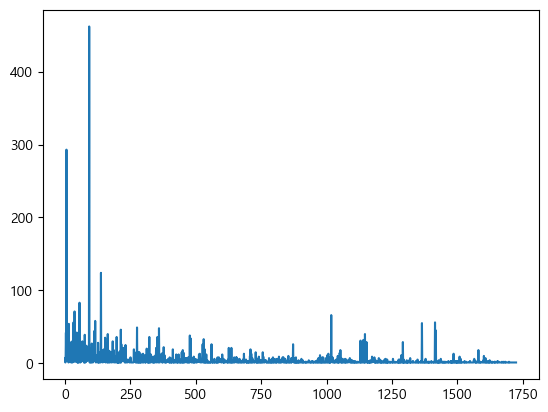

In [34]:
word_cnt_list = [Counter(my_words)[word] for word in Counter(my_words)]
plt.plot(word_cnt_list)
plt.show()

지프의 법칙(Zipf's law)
- 하버드대학교 언어학자 조지 킹슬리 지프가 제안
- 말뭉치의 단어들을 사용빈도가 높은 순서대로 나열하면 단어의 사용빈도는 순위에 반비례한다

#### 빈도수 막대그래프
- 사용 빈도가 높은 상위 20개 단어

In [36]:
cnt_series = pd.Series(Counter(my_words))
df = pd.DataFrame(cnt_series, columns=['freq'])
df

,freq
alice's,7
carroll,1
chapter,11
rabbit,42
hole,5
...,...
loving,1
childhood,1
gather,1
wonderland,1


In [38]:
df_sort = df.sort_values('freq', ascending=False)
df_sort

,freq
said,462
alice,293
little,124
went,83
time,71
...,...
'one,1
steady,1
'some,1
altered,1


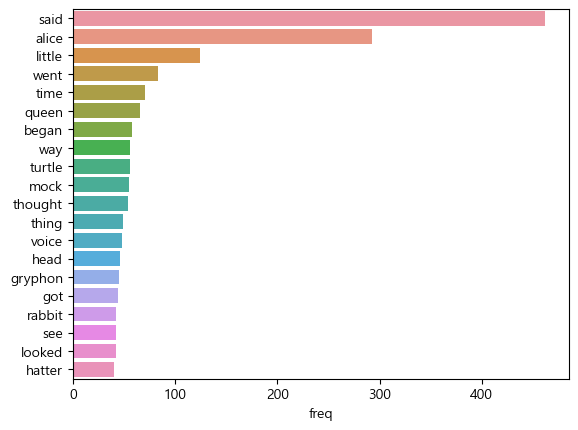

In [39]:
df20 = df_sort.iloc[:20]
sns.barplot(df20,x='freq',y=df20.index)
plt.show()

#### 워드 클라우드(word cloud)

- 텍스트 분석 결과를 보여주는 시각화 도구
- 빈도가 높은 단어는 크게, 낮은 단어는 작게 표시
- 단어 빈도 분포를 한 눈에 파악할 수 있음

워드 클라우드 설치

In [40]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 9.4 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [41]:
import wordcloud
wordcloud.__version__

'1.9.3'

워드 클라우드 이미지 생성 후 plt.imshow()를 이용하여 이미지 출력

In [42]:
from wordcloud import WordCloud

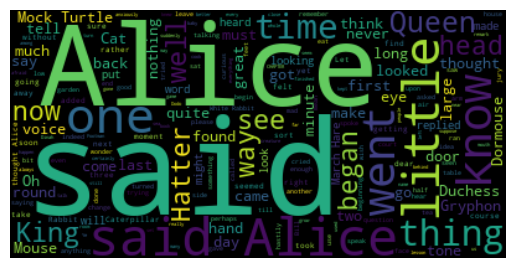

In [43]:
wordcloud = WordCloud().generate(doc_alice) # 이미지

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [44]:
wordcloud.to_array().shape

(200, 400, 3)

wordcloud 폰트 크기 조절 : max_font_size
- 빈도수가 높은 단어와 낮은 단어의 폰트 크기 차이 조절
- 폰트 최대 크기 제한

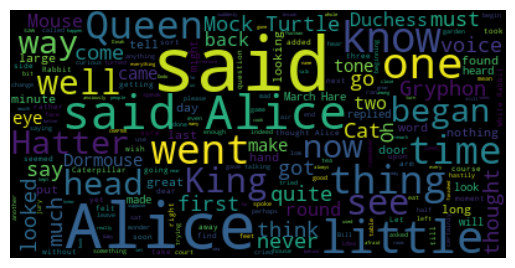

In [45]:
wordcloud = WordCloud(max_font_size=60).generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

토큰화, 불용어 제거, 품사 태깅 등의 작업 결과 활용한 워드클라우드
- generate_from_frequencies() 메서드

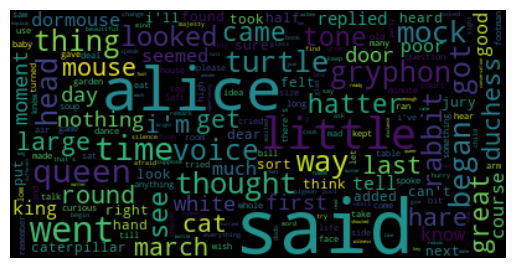

In [46]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(Counter(my_words))

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

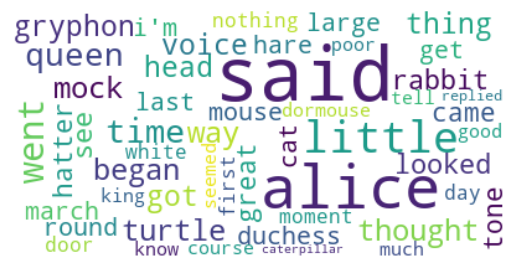

In [48]:
wordcloud = WordCloud(max_font_size=60,
                     background_color='white',
                     max_words=50).generate_from_frequencies(Counter(my_words))

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

이미지 위에 워드 클라우드 출력
- mask 매개변수 사용

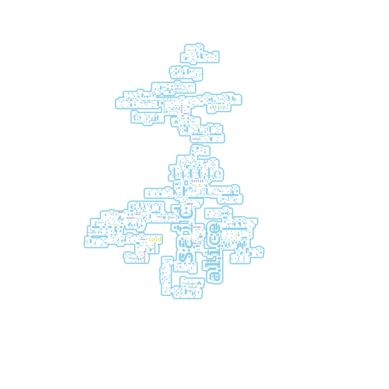

In [53]:
from PIL import Image

alice_mask = np.array(Image.open('data/image/alice_mask.png'))

wordcloud = WordCloud(max_font_size=60,
                     background_color='white',
                     max_words=50,
                     mask= alice_mask,
                     contour_width=3,
                     contour_color='skyblue')
wordcloud.generate_from_frequencies(Counter(my_words))
wordcloud.to_file('data/image/alice_mask.png')

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## 2. 한국어 문서에 대한 시각화

### 예제 데이터

- KoNLPy에서 제공하는 헌법 텍스트
- https://konlpy.org/ko/latest/data/

### 1) 데이터 준비 및 전처리

#### 데이터 읽기

#### 형태소 분석

- 명사만 추출

#### 한 글자 단어 제외

### 3) 시각화

#### 빈도 그래프

#### 워드 클라우드

- 원 문서를 기반으로 한 워드클라우드

- 텍스트 전처리한 데이터 기반의 워드 클라우드

----